# Sinha / Saha exploration

> From 4:28 mark of [New Recipe for Pi - Numberphile](https://youtu.be/nXexsSWrc1Q?t=268s)

He also discusses values for lambda (λ) at 605s (10:05).

`SinhaSaha:=(N, lambda) = 4+sum(1/k!*(1/(k+lambda)-4/(2*k+1))*pochhammer((2*k+1)^2/4/(k+lambda)-k, k-1), k=1..N);`


> Snippet from the appendix in the paper published by Sinha / Saha

![Appendix snippet](./snippet.svg)


In [1]:
import sympy as sp

sp.init_printing(use_unicode=True, order='lex')


def mprint(msg: str, basic: sp.Basic | str | None = None, prec: int | None = None) -> None:
    if prec is not None:
        print(msg, end=' ')
        basic_str = str(basic) if type(basic) != str else basic
        print(f'>>{basic_str[:prec]}<<', end='')
        print(f'{basic_str[prec:]}')
    else:
        print(msg)
        if basic is not None:
            sp.pprint(basic, use_unicode=True)


n = sp.symbols('n', integer=True, positive=True)
λ = sp.symbols('λ', real=True)
SinhaSaha = sp.symbols('SinhaSaha', cls=sp.Function)

> Load control file for 1 million pi digits (pi_1000000.txt) to validate how we are using sympy.pi

In [2]:
# read control file for 1_000_000 digits of pi
import sys
from pi_1000000 import read_pi_control

MILLION = 1_000_000
sys.set_int_max_str_digits(MILLION)

control_pi = read_pi_control('./pi_1000000.txt', MILLION)

def first_index_not_matched(s1: str, s2: str) -> int:
    for i, (c, p) in enumerate(zip(s1, s2, strict=False)):
        if c != p:
            return i
    return -1

In [3]:
DEBUG_PI = True

if DEBUG_PI:
    PREC = MILLION

    prec_pi = sp.pi.evalf(PREC)
    prec_control_pi = control_pi.evalf(PREC)
    accuracy = (prec_control_pi - prec_pi).evalf(PREC/2)
    digits: int = int(sp.Abs(sp.floor(sp.log(accuracy) / sp.log(10))))

    digits_match_until = first_index_not_matched(str(prec_control_pi), str(prec_pi))
    all_digits_matched = digits_match_until == -1

    # subtract 1 from len for decimal point ('.')
    mprint(f'len control_pi: {len(str(prec_control_pi))-1:_}')
    mprint(f'len pi: {len(str(prec_pi))-1:_}')

    mprint(f'do all digits match? {all_digits_matched}')
    mprint(f'{digits_match_until=:_}')

    # mprint('control_pi:\t', str(control_pi.evalf(PREC)), digits)
    # mprint('pi:\t\t', str(pi), digits)

    # mprint('control_pi - pi:', accuracy)

    mprint(f'\n{digits} digits accuracy')

len control_pi: 1_000_000
len pi: 1_000_000
do all digits match? True
digits_match_until=-1

1000000 digits accuracy


## sympy representation of SinhaSaha

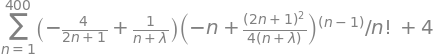

In [4]:
# num_terms = sp.symbols('num_terms', integer=True, positive=True)
# num_terms = sp.oo
num_terms = sp.Integer(400)

sum_left = (1 / sp.factorial(n)) * (1 / (n+λ) - 4 / (2*n + 1))
sum_right = (2*n + 1)**2 / (4 * (n + λ)).factor() - n

SinhaSaha = 4 + sp.Sum(sum_left * sp.rf(sum_right, n-1), (n, 1, num_terms))
SinhaSaha

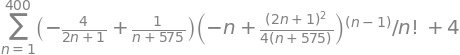

In [5]:
λ_val = 575
sub_expr: sp.Add = SinhaSaha.subs({λ: λ_val}).doit(deep=False)
sub_expr

In [6]:
prec = 130

SinhaSaha_prec = sub_expr.evalf(prec)
SinhaSaha_prec

In [7]:
mprint(f'{num_terms=}')
mprint(f'{λ_val=}')
mprint(f'{prec=}')
print()

pi = sp.pi.evalf(prec)
accuracy = (SinhaSaha_prec - pi).evalf(prec/2)
digits: int = int(sp.Abs(sp.floor(sp.log(accuracy) / sp.log(10))))

mprint('control_pi:\t', str(control_pi.evalf(prec)), digits)
mprint('pi:\t\t', str(pi), digits)

mprint('SinhaSaha:\t', str(SinhaSaha_prec), digits)

mprint('\nSinhaSaha - pi:', accuracy)

mprint(f'\n{digits} digits accuracy')

num_terms=400
λ_val=575
prec=130

control_pi:	 >>3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938<<44610
pi:		 >>3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938<<44610
SinhaSaha:	 >>3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938<<50083

SinhaSaha - pi:
5.4736505513731422770961135774757228427222350468419008579974267864e-126

126 digits accuracy
